# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Member  -**  Vrushabh Dhakad



# **Project Summary -**

The overall aim of this project to analyze the hotel booking dataset from Booking.com to extract valuable insights that can help us optimize revenue, reduce cancellations, and improve overall customer satisfaction.

In order to do this I first took a look at the dataset and got to know its columns and the respective data types in order to figure out the number of duplicate values and missing values.

Then my analysis begins with data wrangling where missing values, outliers and duplicate values in the dataset are handled. Columns such as children, country, agent and company have missing data which needs to be addressed with imputations.

For lead time and adr columns outliers are identified using box plot and then handled using IQR method.

Then, I aggregated some columns in the dataset to find insights such as - finding top countries based on bookings, cancellation for different market segments etc. Along with that I have written all the manipulation done in the data aggregation and found insights.

I have conducted the necessory visualisations and have documented the insights found from the visualization and their business impacts.

Finally, I have given the solutions to the business objective and the necessory conclusion.

# **GitHub Link -**

# **Problem Statement**


**The hotel industry is really competitive and also depends a lot on seasonal demand, which makes managing revenue in off-peak months quite tricky. On top of that, reducing cancellations and keeping customers loyal are key for long-term success. Since booking a hotel is such an important part of planning a trip, customers often get overwhelmed by the huge number of options out there. To stand out, hotels need to offer attractive deals and match the right extras with the right type of customer. To handle all these challenges, it’s important for hotels to analyze their data and find useful insights that can guide smarter decisions.**

#### **Define Your Business Objective?**

increase revenue, reduce cacellations, predict guest preferences

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install gdown
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

### Dataset Loading

In [ ]:
url = "https://drive.google.com/uc?id=1C9AxF9fcVzMw0Bgs0NaRrNML2WwX1Ehm"
output = "Hotel Bookings.csv"
gdown.download(url, output, quiet=False)
booking_df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1C9AxF9fcVzMw0Bgs0NaRrNML2WwX1Ehm
To: /content/Hotel Bookings.csv
100%|██████████| 16.9M/16.9M [00:00<00:00, 112MB/s] 


### Dataset First View

In [ ]:
booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Dataset Rows & Columns count

In [ ]:
booking_df.shape

(119390, 32)

### Dataset Information

In [ ]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
booking_df.duplicated().sum()

np.int64(31994)

#### Missing Values/Null Values

In [ ]:
booking_df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


<Axes: >

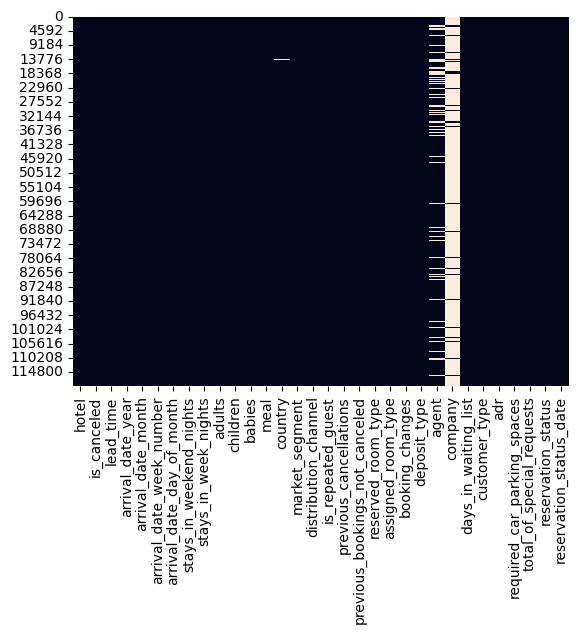

In [ ]:
sns.heatmap(booking_df.isnull(), cbar = False)

### What did you know about your dataset?

This dataset contains booking.com's booking data for year 2015 to 2017. Using this datas we can get to know which type of hotels are doing good and what are the points requires actions. We may provide meaningfull trends and relationship between some categories and so on.

This contains 119390 rows and 32 columns which includes 31994 duplicate rows. children, country, agent and company columns haves missing/Nan values too, so this dataset needs a hard cleaning before doing analysis with this.

## ***2. Understanding Your Variables***

In [ ]:
booking_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description

• hotel : Defining whether the hotel is Resort Hotel or City Hotel (Categorical data)

• is_cancelled : Mentioning the booking is cancelled or not (Categorical data)

• lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

• arrival_date_year : Contains year when the booking is done and values are between 2015 and 2017

• arrival_date_month : Contains month when the booking is done

• arrival_date_week_number : Week number of particular year while arriving

• arrival_date_day_of_month : Date of arrival to hotel

• stays_in_weekend_nights : Number of nights stayed in weekends

• stays_in_week_nights : Number of nights stayed in weekdays

• adults : Number of adults

• children : Number of childrens

• babies : Number of babies

• meal : Kind of meal opted for which haves four defined categories(BB, FB, HB, SC) and one undefined category (Categorical data)

• country : Country code of hotel

• market_segment : Which segment that customer belongs to (Categorical data)

• distribution_chanel : How the customer accessed the stay there are four categories corporate, direct, GDS, TA/TO and also some are undefined (Categorical data)

• is_repeated_guest : Shows whether customer is already visited or new (Categorical data)

• previous_cancellation : number of previously cancelation by customer

• previous_booking_not_cancelled : number of previously booked and stayed by customer

• reserved_room_type : Consists one among the 10 room types (Categorical data)

• assigned_room_type : Which contains type of room reserved (Categorical data)

• booking_changes : Count of changes made to booking

• deposit_type : Deposit type (Categorical data)

• agent : Booked through agent

• days_in_waiting_list : Number of days in waiting list

• customer_type : Categorical data contains the type of customer

• customer_type : Categorical data contains the type of customer

• adr : Average Daily rate

• required_car_parking : If car parking is required (Categorical data)

• total_of_special_req : Number of additional special requirements

• reservation_status : Reservation of status (Categorical data)

• reservation_status_date : Date of the specific status

### Check Unique Values for each variable.

In [ ]:
for i in list(booking_df.columns):
  print(f"No. of unique values in {i} is {booking_df[i].nunique()}.")

No. of unique values in hotel is 2.
No. of unique values in is_canceled is 2.
No. of unique values in lead_time is 479.
No. of unique values in arrival_date_year is 3.
No. of unique values in arrival_date_month is 12.
No. of unique values in arrival_date_week_number is 53.
No. of unique values in arrival_date_day_of_month is 31.
No. of unique values in stays_in_weekend_nights is 17.
No. of unique values in stays_in_week_nights is 35.
No. of unique values in adults is 14.
No. of unique values in children is 5.
No. of unique values in babies is 5.
No. of unique values in meal is 5.
No. of unique values in country is 177.
No. of unique values in market_segment is 8.
No. of unique values in distribution_channel is 5.
No. of unique values in is_repeated_guest is 2.
No. of unique values in previous_cancellations is 15.
No. of unique values in previous_bookings_not_canceled is 73.
No. of unique values in reserved_room_type is 10.
No. of unique values in assigned_room_type is 12.
No. of unique

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
booking_df.drop_duplicates(inplace = True)

In [ ]:
booking_df.drop('is_canceled', axis = 1, inplace = True)

In [ ]:
booking_df.replace({'meal': {'Undefined': 'No Meal'}}, inplace=True)

In [ ]:
booking_df.fillna({'children':0}, inplace = True)

In [ ]:
booking_df.fillna({'country': booking_df['country'].mode()[0]}, inplace = True)

In [ ]:
booking_df.drop('distribution_channel', axis =1, inplace = True)

In [ ]:
booking_df.replace({'is_repeated_guest':{0:'No',1:'Yes'}}, inplace = True)

In [ ]:
booking_df.fillna({'agent': 'No agent'}, inplace = True)

In [ ]:
booking_df.fillna({'company':'No company'}, inplace = True)

In [ ]:
arrival_date = booking_df['arrival_date_year'].astype(str) + '-' + booking_df['arrival_date_month'] + '-' + booking_df['arrival_date_day_of_month'].astype(str)
booking_df['arrival_date'] = pd.to_datetime(arrival_date)

In [ ]:
booking_df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis = 1, inplace = True)

In [ ]:
booking_df['reservation_status_date'] = pd.to_datetime(booking_df['reservation_status_date'])

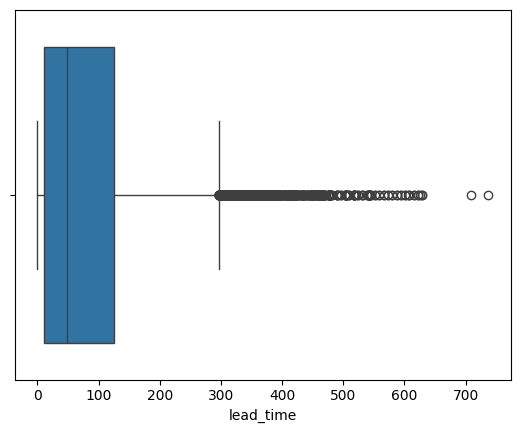

In [ ]:
sns.boxplot(x = 'lead_time', data = booking_df)

plt.show()

In [ ]:
booking_df = booking_df[(booking_df.loc[:,'lead_time'] >= booking_df.loc[:,'lead_time'].quantile(0.05)) & (booking_df.loc[:,'lead_time'] <= booking_df.loc[:,'lead_time'].quantile(0.95))]

In [ ]:
booking_df = booking_df[booking_df['market_segment'] != 'Undefined']

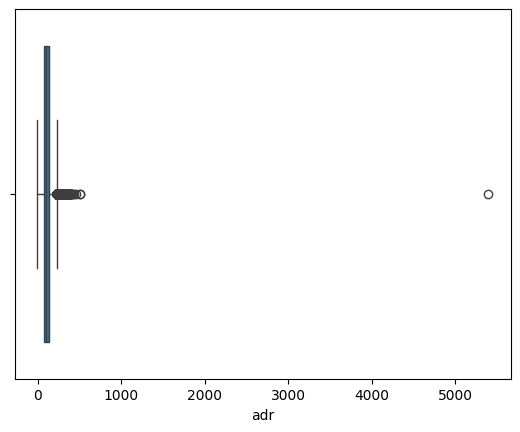

In [ ]:
sns.boxplot(x = 'adr', data = booking_df)

plt.show()

In [ ]:
booking_df = booking_df[(booking_df.loc[:,'adr'] >= booking_df.loc[:,'adr'].quantile(0.05)) & (booking_df.loc[:,'adr'] <= booking_df.loc[:,'adr'].quantile(0.95))]

In [ ]:
room_type_avg_lead_time = booking_df.groupby("reserved_room_type").agg({"lead_time":"mean"}).rename(columns={"lead_time":"avg_lead_time"}).sort_values(by = "avg_lead_time", ascending = False).reset_index()

room_type_avg_lead_time

,reserved_room_type,avg_lead_time
0,B,98.323671
1,E,77.270221
2,D,76.164824
3,C,68.237856
4,G,67.102273
5,F,66.971307
6,A,66.499113
7,H,51.882353
8,L,0.000000


In [ ]:
top_meal_category = booking_df['meal'].mode()[0]

print(f"Most of the peoples are prefering '{top_meal_category}' category meal.")

Most of the peoples are prefering 'BB' category meal.


In [ ]:
booking_count_countrywise = booking_df['country'].value_counts()
print("Top 5 countries based on booking count as follows :")

booking_count_countrywise.head()

Top 5 countries based on booking count as follows :


,count
country,
PRT,22430
GBR,8668
FRA,8197
ESP,6172
DEU,4843


In [ ]:
market_segment_cancellation_count = booking_df[(booking_df['reservation_status'] == 'Canceled') |
                                (booking_df['reservation_status'] == 'No-Show')].groupby('market_segment').agg({'reservation_status':'count'}).rename(columns = {'reservation_status':'cancellation_count'}).sort_values(by = 'cancellation_count', ascending = False).reset_index()
print(market_segment_cancellation_count)

  market_segment  cancellation_count
0      Online TA               15684
1  Offline TA/TO                1651
2         Direct                1402
3         Groups                 839
4      Corporate                 452
5       Aviation                  44
6  Complementary                   2


In [ ]:
top_room_type = booking_df.groupby(['market_segment', 'reserved_room_type']).size().reset_index(name='room_type_count').sort_values(by = ['market_segment', 'room_type_count'], ascending = [True, False]).drop_duplicates(subset=['market_segment'], keep='first').reset_index()
top_room_type.drop('index', axis = 1, inplace = True)
top_room_type

,market_segment,reserved_room_type,room_type_count
0,Aviation,A,117
1,Complementary,A,20
2,Corporate,A,3118
3,Direct,A,5696
4,Groups,A,3107
5,Offline TA/TO,A,8180
6,Online TA,A,29356


In [ ]:
agent_cancellation = booking_df[booking_df['reservation_status'] != 'Check-Out'].groupby('agent').agg({'reservation_status':'count'}).rename(columns = {'reservation_status':'cancellation_count'}).sort_values(by = 'cancellation_count', ascending = False).reset_index()
agent_cancellation.drop(agent_cancellation[agent_cancellation['agent'] == 'No agent'].index, inplace = True)
agent_cancellation = agent_cancellation[agent_cancellation['cancellation_count']>50]
agent_cancellation

,agent,cancellation_count
0,9.0,10518
1,240.0,3673
3,14.0,525
4,7.0,395
5,250.0,356
6,8.0,328
7,242.0,173
8,1.0,167
9,241.0,161
10,83.0,145


In [ ]:
deposit_cancellation = booking_df[booking_df['reservation_status'] != 'Check-Out'].groupby('deposit_type').agg({'reservation_status':'count'}).rename(columns = {'reservation_status':'cancellation_count'}).sort_values(by = 'cancellation_count', ascending = False).reset_index()
deposit_cancellation

,deposit_type,cancellation_count
0,No Deposit,19467
1,Non Refund,589
2,Refundable,18


In [ ]:
car_parking_room_type = booking_df[booking_df['required_car_parking_spaces'] != 0].groupby(['reserved_room_type','required_car_parking_spaces']).agg({'required_car_parking_spaces':'count'}).rename(columns = {'required_car_parking_spaces':'count'}).sort_values(by=['required_car_parking_spaces', 'count'], ascending=[True, False]).reset_index()
car_parking_room_type

,reserved_room_type,required_car_parking_spaces,count
0,A,1,3450
1,D,1,1112
2,E,1,833
3,F,1,274
4,G,1,264
5,C,1,112
6,H,1,110
7,B,1,33
8,A,2,13
9,D,2,3


In [ ]:
customer_type_cancellation = booking_df[booking_df['reservation_status'] != 'Check-Out'].groupby('customer_type').agg({'reservation_status':'count'}).rename(columns = {'reservation_status':'cancellation_count'}).sort_values(by = 'cancellation_count', ascending = False).reset_index()
customer_type_cancellation

,customer_type,cancellation_count
0,Transient,18293
1,Transient-Party,1338
2,Contract,412
3,Group,31


In [ ]:
df = pd.DataFrame(booking_df)
c = df.to_csv("Cleaned_Hotel_Booking.csv")

### What all manipulations have you done and insights you found?

1) Aggregated the lead time for reserved room type -
insight: Rooms of type 'B' tend to have a longer average lead time, so it's important to closely monitor these bookings. Consider reaching out to customers in advance to confirm their dates and ensure their reservations.

2) Found the top meal category -
insight: The BB meal type is the most preferred, so if you're considering offering promotions on food, make BB the focal point. Additionally, encourage hotels to provide or emphasize this meal option to attract more customers.

3) Booking count countrywise -
insight: PRT, GBR, FRA, ESP, and DEU are the top-performing countries. Strengthening partnerships with more hotels in these countries could significantly increase bookings and drive further growth.

4) Aggregated cancellation count by each market segment -
insight: The Online TA market segment has a high number of cancellations. To address this, consider organizing meetings or workshops with these agents and implementing targeted actions or offering incentives to help reduce cancellations.

5) market segment wise top performing room type -
insight: All market segments show a strong preference for A-type rooms, but availability is limited. To better meet customer demand and enhance retention, consider increasing the number of A-type rooms.

6) Aggregated agent with cancellation -
insight: Agent 9.0 has the highest number of cancellations. Conduct an investigation to identify the root causes of the issue and address any potential problems.

7) Comparing the cancellation with deposit type -
insight: The "No Deposit" option has a high cancellation rate. Consider implementing a refundable deposit policy, as bookings with refundable deposits tend to have lower cancellation rates.

8) Aggregated the car parking and room type -
insight: Customers booking A-type rooms have the highest demand for car parking. As discussed earlier, ensure parking facilities are provided when building additional A-type rooms.
Most customers only require a single parking slot, with very few needing more than one. To optimize costs, avoid overspending on parking spaces regardless of the number of rooms.

9) Aggregated the customert type with the cancellation -
insight: Transient customers have a high cancellation rate. To retain them, consider offering special deals and complimentary refreshments. This could help reduce cancellations and improve customer satisfaction.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

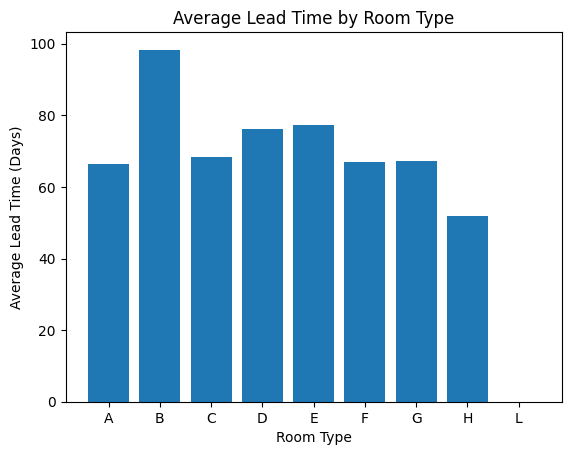

In [ ]:
avg_lead_time = booking_df.groupby('reserved_room_type')['lead_time'].mean()
plt.bar(avg_lead_time.index, avg_lead_time.values)
plt.title('Average Lead Time by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Lead Time (Days)')
plt.show()

##### 1. Why did you pick the specific chart?

**Answer** As this comparison between a categorical and numerical variables Bar Chart plays good role in this.

##### 2. What is/are the insight(s) found from the chart?

Answer Room type B is the type which haves high leadtime over 3 months, L and P haves the lowest, all others are having average around 60-80 days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer As customers tend to book three months in advance, consider keeping the booking window open for up to six months.

This approach can help minimize long waitlists, preventing negative perceptions that the website lacks sufficient rooms and is out of stock well in advance.

#### Chart - 2

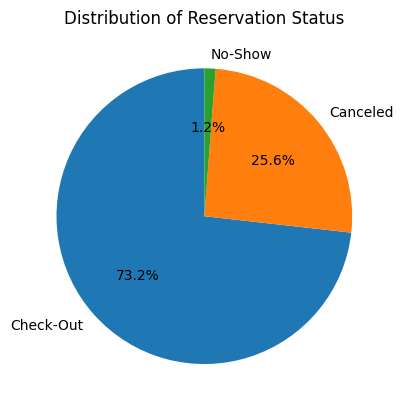

In [ ]:
plt.pie(booking_df['reservation_status'].value_counts(), labels = booking_df['reservation_status'].value_counts().index, autopct='%1.1f%%', startangle = 90)
plt.title('Distribution of Reservation Status')
plt.show()

##### 1. Why did you pick the specific chart?

Answer As this holds limited number of categories and piechart helps in ease of visualization to observe contribution of each categories quickly.

##### 2. What is/are the insight(s) found from the chart?

Answer Over 27% peoples not visited as per the booking.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer This shows that there is some issue with business that we need to focus on and take actions to resolve those issues. Also taking feedback survey while cancelling the booking helpfull for business to know what actually customer needs.

Eventhough 73% is a good number Business needs to maintain this streak by analysing and providing the needfulls.

#### Chart - 3

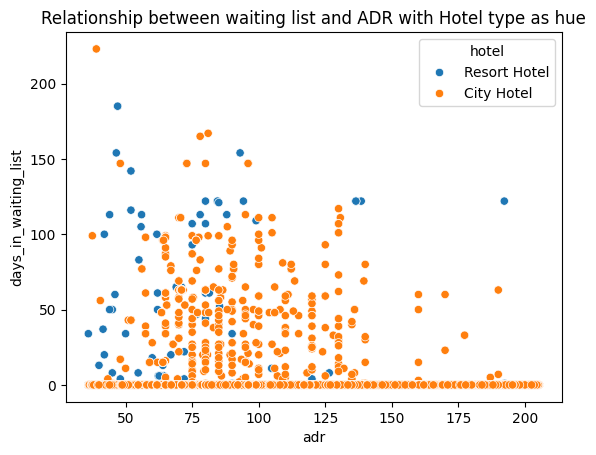

In [ ]:
sns.scatterplot(data = booking_df, x = 'adr', y = 'days_in_waiting_list', hue = 'hotel')
plt.title('Relationship between waiting list and ADR with Hotel type as hue')
plt.xlabel('adr')
plt.ylabel('days_in_waiting_list')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Plotting relation two continuous variable with hotel type as hue, so scatter plot provides asthetic and visually pleasing chart.

##### 2. What is/are the insight(s) found from the chart?

Answer High waiting list for resort hotels.Lack of Resort hotels at mid and premium category.Low waiting list for city hotels in low and high ADR category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer High waiting list for resort hotels with lower prices suggests strong demand. The business could consider increasing the availability of resort hotel rooms, especially during peak seasons, or adjust pricing strategies to better match demand. This could help reduce waiting times and increase occupancy, improving overall customer satisfaction. otherwise high waiting list could negatively impact the customer experience if bookings are delayed or unavailable.

The lack of waiting lists for City hotels at lower and premium category suggests that there may be lack of increasing demand. The business could introduce targeted promotions, enhance the guest experience, or offer additional services to attract more bookings, especially during off-peak times.

#### Chart - 4

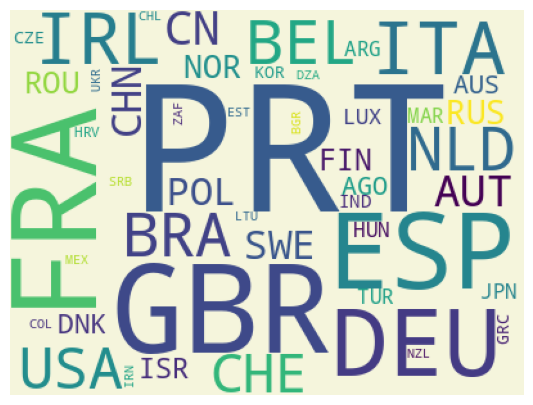

In [ ]:
country_dict = booking_df['country'].value_counts().to_dict()
wordcloud = WordCloud(width = 400, height = 300, min_font_size = 10, background_color='beige').generate_from_frequencies(country_dict)
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'antialiased')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

Answer We have several category in this variable and it adds up visually intresting effect which encourages busines's interactivity on this project.

##### 2. What is/are the insight(s) found from the chart?

Answer PRT, GBR, FRA, ESP, DEU are top performing countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer This trend may be due to the countrie's tourism or industrial cultures, In order to maintain this trend the business may offer some discounts for top performing agents as they plays significant roles to attain this.

Also finding good agents and advertising on least popular countries results in good impact.

#### Chart - 5

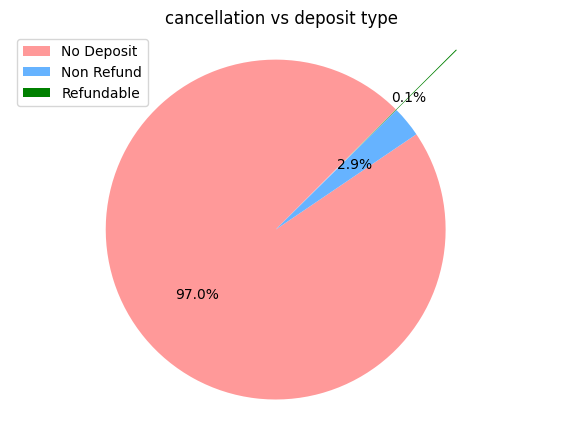

In [ ]:
deposit_cancellation = booking_df[booking_df['reservation_status'] != 'Check-Out'].groupby('deposit_type').agg({'reservation_status':'count'}).rename(columns = {'reservation_status':'cancellation_count'}).sort_values(by = 'cancellation_count', ascending = False).reset_index()
legends = deposit_cancellation['deposit_type']
sizes = deposit_cancellation['cancellation_count']
plt.figure(figsize= (7,5))
plt.pie(sizes, autopct='%1.1f%%', startangle=45, explode = (0, 0, 0.5), colors=['#ff9999','#66b3ff','green'])
plt.legend(legends)
plt.axis('equal')
plt.title('cancellation vs deposit type')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Pie chart helps in getting distributions over categories easily.

##### 2. What is/are the insight(s) found from the chart?

Answer The "No Deposit" option has a high cancellation rate and refundable option has less cancellation than non-refundable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Consider adopting a refundable deposit policy, as bookings with refundable deposits generally experience very lower cancellation rates. By providing incentives for customers to select refundable options, the business can decrease overall cancellations, improve customer satisfaction, and stabilize revenue.

#### Chart - 6

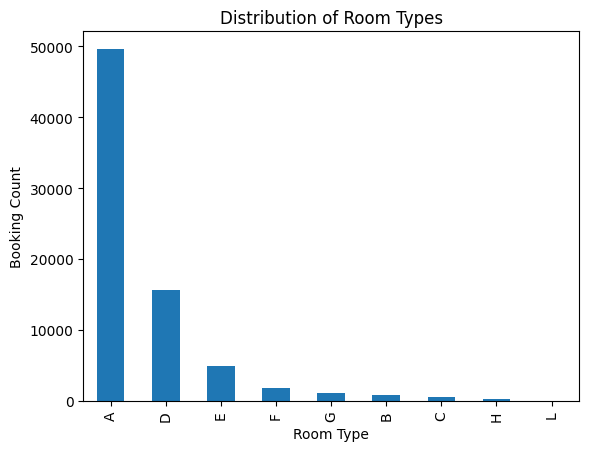

In [ ]:
booking_df['reserved_room_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Booking Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Bar charts can be sorted by height, which allows for quick identification of the most and least popular room types, aiding in prioritization.

Bar charts are intuitive and easy for audiences to understand. Viewers can quickly grasp the distribution of room types without needing extensive background knowledge.

##### 2. What is/are the insight(s) found from the chart?

Answer 'A' type rooms are the most booked whereas 'L' and 'P' are least.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer "A" type rooms are the most boooked type, business needs to ensure enough rooms are available in such category, if not need to take initiative to build new rooms.

"L" and "p" are the least booked types, try to invest less on those type rooms in future. Providing discounts for such type rooms leads to gain more customers.

#### Chart - 7

[]

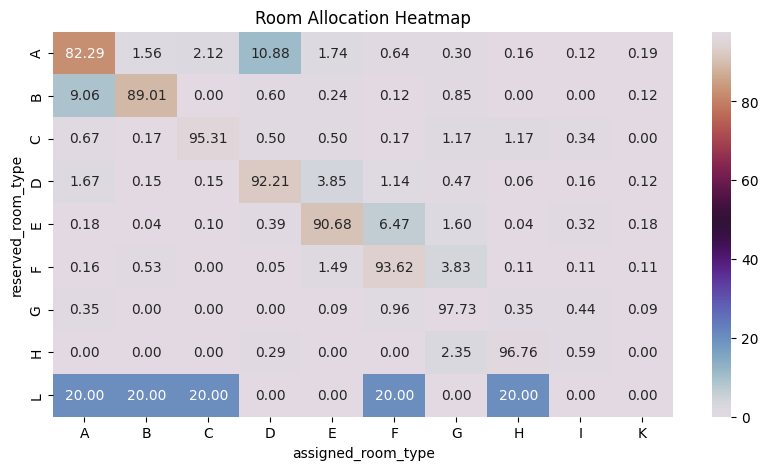

In [ ]:
room_booking_matrix = pd.crosstab(booking_df['reserved_room_type'], booking_df['assigned_room_type'], normalize = 'index' )*100
plt.figure(figsize=(10,5))
sns.heatmap(room_booking_matrix, annot = True, fmt = '.2f', cmap = 'twilight')
plt.title('Room Allocation Heatmap')
plt.plot()

##### 1. Why did you pick the specific chart?

Answer it provides a clear, color-coded representation of the frequency of each combination. This allows us to quickly identify patterns and easier to interpret.

##### 2. What is/are the insight(s) found from the chart?

Answer This analysis reveals that 20% of room type A reservations are being reassigned to a different room type. This insight highlights a potential gap between customer expectations and actual room allocation particularly in premium category rooms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer If customers receive the room type they reserved, especially when it involves premium or in-demand rooms, it can lead to increased revenue from premium services.

If this issue is left unaddressed, customers who reserve a specific room type may feel dissatisfied when they are assigned a different room type. This could lead to negative reviews, reduced customer loyalty, and loss of repeat business.

#### Chart - 8

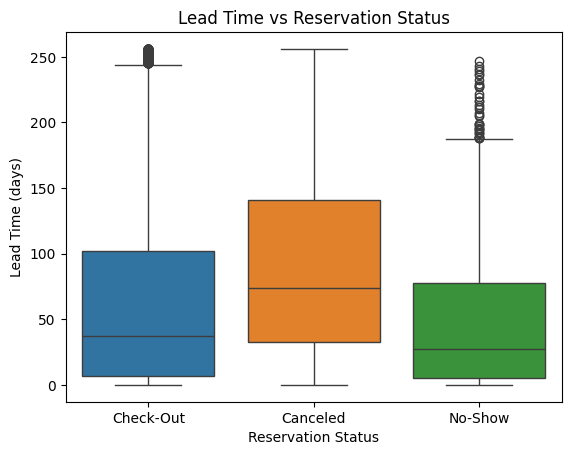

In [ ]:
sns.boxplot(x = 'reservation_status', y= 'lead_time', data = booking_df, hue = 'reservation_status')
plt.title('Lead Time vs Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Lead Time (days)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Comparing a categorical variable over continuous variable so Box plot gives appropriate visaulization.

##### 2. What is/are the insight(s) found from the chart?

Answer Increase in Lead time results on cancellation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Try to get in touch with customers with high lead time by providing whatsapp advertisements like what are the things to do at the destination, attractions present there.

Requesting to fill a quick feedback form while cancelling may hellpfull to know what customers actually thinking and try to avoid those things happen.

#### Chart - 9

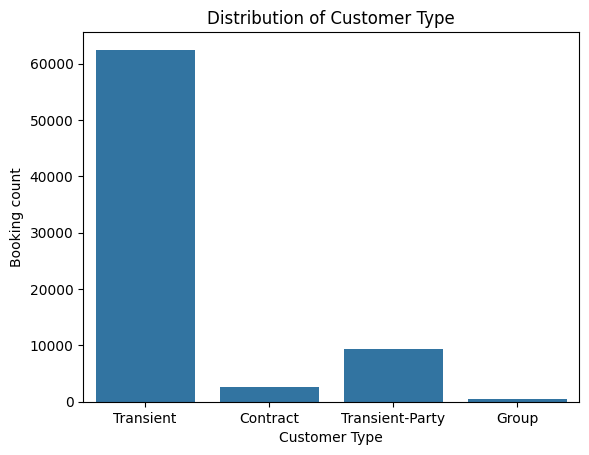

In [ ]:
sns.countplot(data = booking_df, x = 'customer_type')
plt.title('Distribution of Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Booking count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Countplots are designed for categorical data, making them ideal for displaying the frequency of distinct customer types.

##### 2. What is/are the insight(s) found from the chart?

Answer Transient is the highest performing customer category, while Group is the lowest performing category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Providing added perks such as meal coupons and buffet breakfasts for the transient group helps maintain their high engagement and sustaining their strong performance.

On the other hand, the low performance of the Group category may stem from factors such as inadequate room size. The business should focus on attracting more group bookings, as this segment has significant financial potential. Collaborating with travel agents who offers group tour packages could be a strategic approach to boost performance in this category.

#### Chart - 10

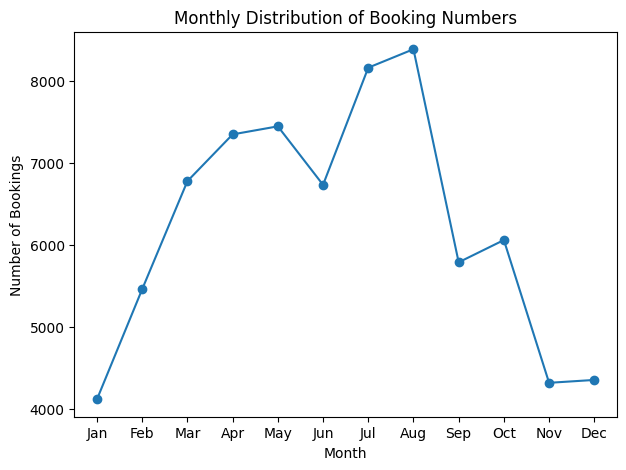

In [ ]:
monthly_counts = booking_df.groupby(booking_df['arrival_date'].dt.month)['reservation_status'].size()
plt.figure(figsize=(7,5))
monthly_counts.plot(kind = 'line', marker = 'o')
plt.xlim(0.5, 12.5)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Monthly Distribution of Booking Numbers')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Line charts are ideal for tracking how values evolve over a continuous period, making them perfect for visualizing trends.

##### 2. What is/are the insight(s) found from the chart?

Answer Trend gradually starts increasing from February, peaks at August, suddent downturn occur in september and remains flat untill january.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Since summer is the peak travel season, our business thrives during this period. To stay on the right track, it's crucial to maintain sustainability by ensuring more hotels and customer service executives are available during these busy months.

On the other hand, winter trends indicate a need for attention. Focus on increasing advertising efforts and promoting winter activities. Offering complimentary activity kits at hotels can be an effective way to attract more guests and boost engagement during the winter season.

#### Chart - 11

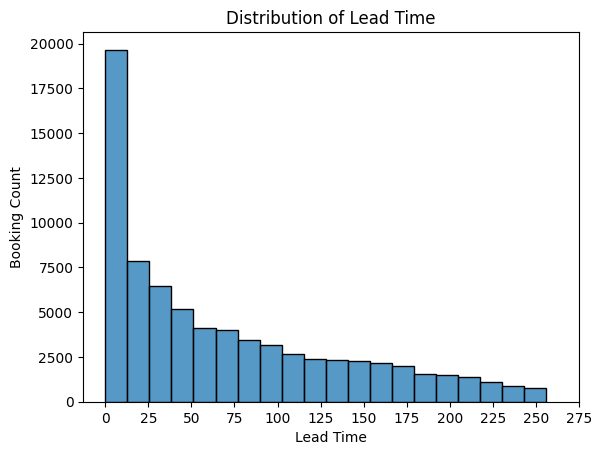

In [ ]:
sns.histplot(data = booking_df, x = 'lead_time', bins=20)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Booking Count')
plt.xticks(range(0, 300, 25))
plt.show()

##### 1. Why did you pick the specific chart?

Answer As we are ploting for a continuous data variable hist plot suits better and helps on getting distributions clearly.

##### 2. What is/are the insight(s) found from the chart?

Answer Most peoples are booking at last minute only.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer We need to promote and give offers for early booking, need to check whether there is any glitches on our website while booking and make the website user friendly, compare with competitor's websites and try to implement positive feedbacks present there.

#### Chart - 12

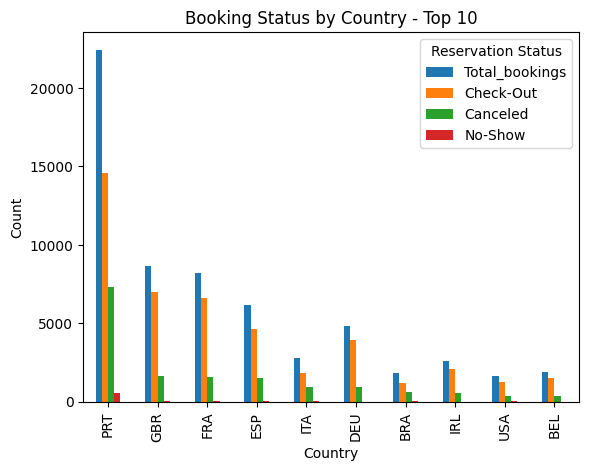

In [ ]:
status_count_per_country = booking_df.groupby(['country', 'reservation_status']).size().unstack(fill_value=0).sort_values(by='Canceled', ascending=False)
status_count_per_country['Total_bookings'] = status_count_per_country['Canceled'] + status_count_per_country['Check-Out'] + status_count_per_country['No-Show']
status_count_per_country = status_count_per_country[['Total_bookings', 'Check-Out', 'Canceled', 'No-Show']].head(10)
status_count_per_country.plot(kind = 'bar')
plt.title('Booking Status by Country - Top 10')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Reservation Status')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Each country has multiple bars representing different categories and we comparing this over count so Grouped Bar chart is the best option.

##### 2. What is/are the insight(s) found from the chart?

Answer All countries have considerable amount of cancellation with respective chech outs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer By understanding the reasons behind the cancellation with respect to each country, the business can implement targeted strategies to improve customer satisfaction, streamline the booking process, and can reduce cancellations which leads to increase in revenue.

If the cancellation rates are not addressed, they could result in financial losses as each cancellation represents missed revenue opportunities. There can be a time where the cancellation rate get higher than the checkout if not addressed.

#### Chart - 13

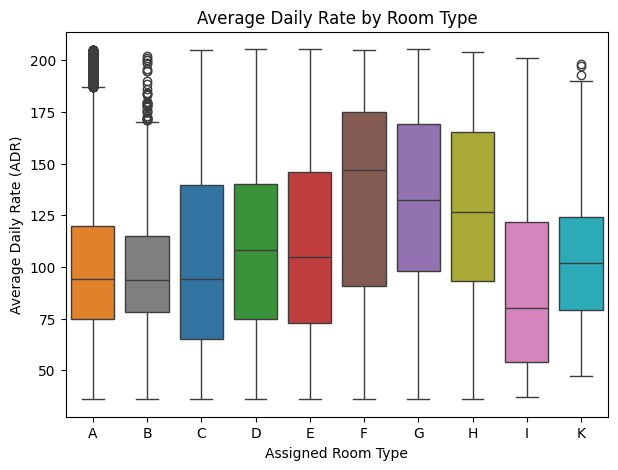

In [ ]:
sorted_values = booking_df['assigned_room_type'].sort_values().unique()
plt.figure(figsize=(7,5))
sns.boxplot(x = 'assigned_room_type', y = 'adr', data = booking_df, order = sorted_values, hue = 'assigned_room_type')
plt.xlabel('Assigned Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Average Daily Rate by Room Type')
plt.show()

##### 1. Why did you pick the specific chart?

Answer We're comparing multiple categories over adr(numeric data), So box plot gives clear picture by providing seperate box for each category. Also here we're analyzing for cost related thing so instead of averaging values box gives actually where business haves high potential by exploding the outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer F type rooms holds high potential average while I is the lowest.
Premium room segment's contribution is low in point of adr.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that Room Type F has a high ADR potential allows the business to allocate more resources, focus promotions, and optimize bookings for this room type to maximize revenue.

Also should target the right customer base where we can promote the premium room types.

If premium rooms are not performing well, the business is missing out on opportunities to upsell to higher-paying customers, which could negatively impact long-term profitability.

#### Chart - 14 - Correlation Heatmap

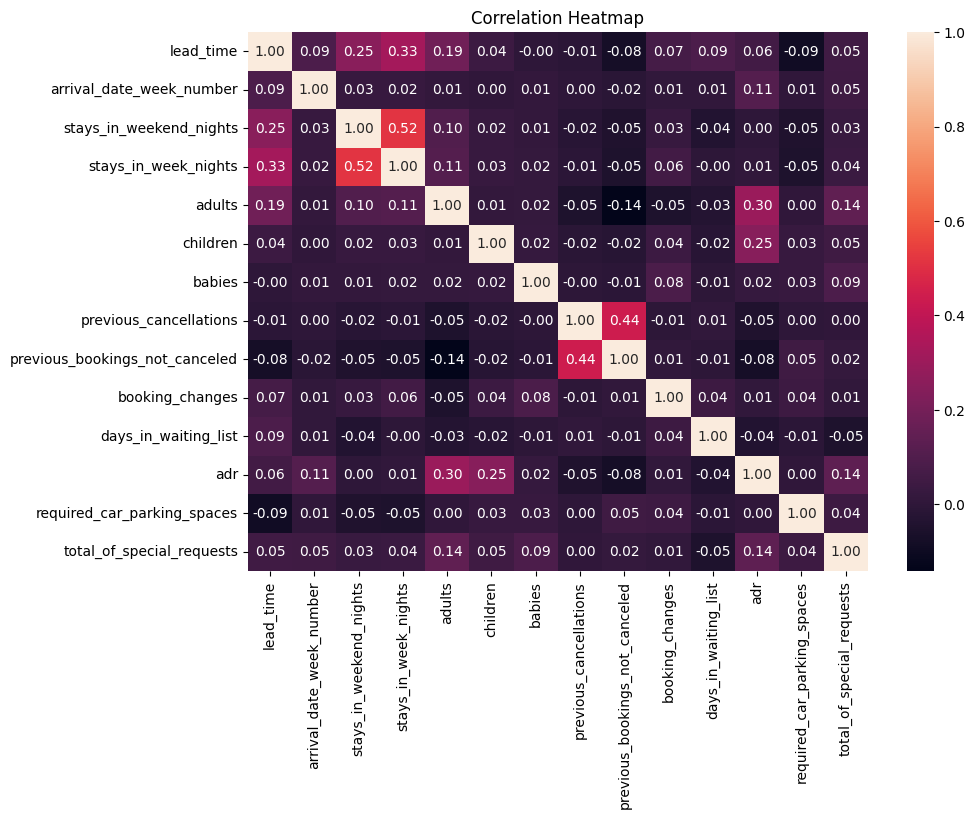

In [ ]:
numerical_cols = booking_df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,7))
sns.heatmap(numerical_cols.corr(), annot = True, fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Heatmap helps in identifying relationship and patterns when comparing with large set of categories.

##### 2. What is/are the insight(s) found from the chart?

Answer This plot gives relations between all numerical values present in the given data.

#### Chart - 15 - Pair Plot

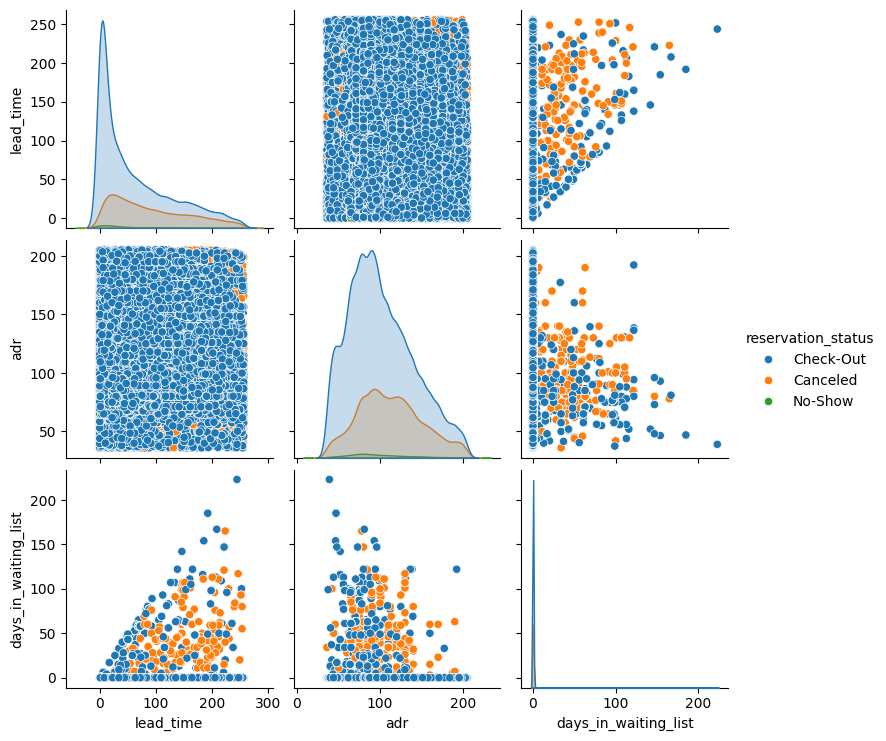

In [ ]:
cols = booking_df[['lead_time', 'adr', 'days_in_waiting_list', 'reservation_status']]
sns.pairplot(cols, diag_kind = 'kde', hue = 'reservation_status')
plt.show()

##### 1. Why did you pick the specific chart?

Answer A pair plot is an effective tool for identifying the best set of features to explain relationships between variables or to distinguish clusters in the data. It can also aid in forming simple classification models by visually highlighting separations or linear relationships within the dataset.

I used a pair plot to analyze patterns and relationships between features. It offers a graphical representation similar to a correlation matrix, but provides more detailed insights by visually displaying how variables interact with each other.

##### 2. What is/are the insight(s) found from the chart?

Answer Lead time gives direct proportion with waiting list.

Longer waiting list and lead time leads to cancellation at several points.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer

1) Reduce spending on parkings as very low number of people are in need of it and most of whom who do need them requires only one or two.

2) Placing more executives and monitoring website actions over summer season is more important due to high demand.

3) Offering BB type meals to Transients which is the most popular meal type in order to reduces their high cancellations.

4) Changing deposit type from no deposit to refundable.

5) Resort hotels need to be provided high in number to reduce demand and cancellations due to waiting list.

6) Need to provide inpersonal interactions with tansient customers and offering complimentary breakfasts.

# **Conclusion**

Write the conclusion here.

1) Need to find the strategies to promote premium rooms as they have less booking counts.

2) Winters need more discounts and advertisements.

3) Need additional hotels in order to reduce waiting list.

4) Transients need to be monitored as they are top performing and cancelling category.

5) Strengthening partnerships with high-performing countries.

6) Find the strategies to promote premium rooms as they have less booking counts.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***